# Visualizing CARTs with admissions data

Using the admissions data from earlier in the course, build CARTs, look at how they work visually, and compare their performance to more standard, parametric models.


---

### Install and load the packages required to visually show decision tree branching

You will need to first:

1. Install `graphviz` with homebrew (on OSX - not sure what linux uses). The command will be `brew install graphviz`
- Install `pydotplus` with `pip install pydotplus`
- Load the packages as shown below (you may need to restart the kernel after the installations.)

In [7]:
# REQUIREMENTS:
# pip install pydotplus
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

---

### Load in admissions data and other python packages

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
admit = pd.read_csv('assets/admissions.csv')

def eda(dataframe):
    
    print "missing values \n", dataframe.isnull().sum()## count number of null values per column
    print ''
    print "dataframe types \n", dataframe.dtypes       ## list data type of each column
    print ''
    print "dataframe shape \n", dataframe.shape        ## rows by columns
    print ''
    print "dataframe describe \n", dataframe.describe()## stats -- mean, min, max, etc.. 
    print ''
    for item in dataframe:                             ## count number of unique values per column
        print item, dataframe[item].nunique()
    print ''
    print 'num duplicates:', dataframe.duplicated().sum()

eda(admit)

missing values 
admit       0
gre         2
gpa         2
prestige    1
dtype: int64

dataframe types 
admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

dataframe shape 
(400, 4)

dataframe describe 
            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000

admit 2
gre 26
gpa 132
prestige 4

num duplicates: 5


In [10]:
admit.dropna(axis=0, inplace=True)

---

### Create regression and classification X, y data

The regression data will be:

    Xr = [admit, gre, prestige]
    yr = gpa
    
The classification data will be:

    Xc = [gre, gpa, prestige]
    yc = admit

In [11]:
Xr = admit[['admit', 'gre', 'prestige']]
yr = admit.gpa

Xc = admit[['gre', 'gpa', 'prestige']]
yc = admit.admit

---

### Cross-validate regression and logistic regression on the data

Fit a linear regression for the regression problem and a logistic for the classification problem. Cross-validate the R2 and accuracy scores.

Cross-validated scores: [ 0.26512863  0.21147102  0.18592367  0.15714507 -0.01852861  0.02494205
  0.05724143  0.23079563  0.1257602   0.10716732]
Cross-Predicted Accuracy: 0.149102131204


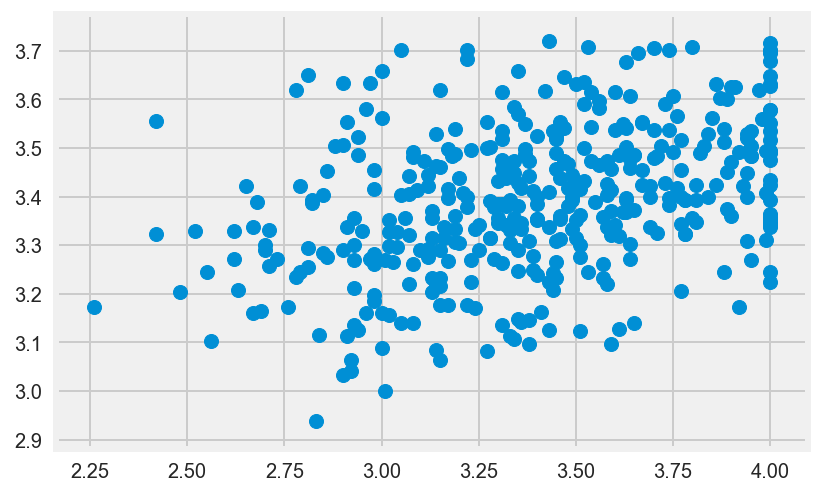

In [12]:
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import datasets, linear_model, metrics

X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.33)
# fit a model
lm = linear_model.LinearRegression()

# pass in the training set
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

folds=10
scores = cross_val_score(model, Xr, yr, cv=folds)
print "Cross-validated scores:", scores
# Make cross validated predictions
predictions = cross_val_predict(model, Xr, yr, cv=folds)
plt.scatter(yr, predictions)
accuracy = metrics.r2_score(yr, predictions)
print "Cross-Predicted Accuracy:", accuracy

In [13]:
log = linear_model.LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(Xc, yc, test_size=0.33)
model = log.fit(X_train,y_train)
predictions = model.predict(X_test)

def cross_val(model,X,y):
    folds=10
    scores = cross_val_score(model, X, y, cv=folds)
    print "Cross-validated scores:", scores
    # Make cross validated predictions
    predictions = cross_val_predict(model, X, y, cv=folds)
    accuracy = metrics.r2_score(y, predictions)
    print "Cross-Predicted Accuracy:", accuracy

cross_val(model,X_train,y_train)

Cross-validated scores: [ 0.66666667  0.66666667  0.77777778  0.77777778  0.66666667  0.65384615
  0.80769231  0.69230769  0.61538462  0.73076923]
Cross-Predicted Accuracy: -0.396621621622


---

### Building regression trees

With `DecisionTreeRegressor`:

1. Build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the R2 scores of each of the models and compare to the linear regression earlier.

In [117]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import sklearn.datasets as datasets

def build_tree_model(X,y,max_depth_num,classifier):

    if max_depth_num==0:
        model = classifier(criterion='mse')
    else:
        model = classifier(criterion='mse', max_depth=max_depth_num)    
    model = model.fit(X, y)
    return model

In [118]:
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.33)
for num in [1,2,3,0]:
    model = build_tree_model(X_train, y_train, num, DecisionTreeRegressor)
    cross_val(model, X_train, y_train)

Cross-validated scores: [-0.045377   -0.3212297   0.003542   -0.08043418 -0.10466956  0.096332
  0.07690071 -0.06142597 -0.04414546 -0.08119136]
Cross-Predicted Accuracy: 0.0242260195759
Cross-validated scores: [-0.11034661 -0.31940771 -0.09994477 -0.1080923  -0.01080583  0.13219622
  0.07491895 -0.08850149 -0.10122076 -0.08080194]
Cross-Predicted Accuracy: 0.00420544621295
Cross-validated scores: [-0.1196582  -0.40596732 -0.1422324  -0.00431227  0.08612461  0.05651188
  0.08819608 -0.31708247 -0.34201124 -0.04386939]
Cross-Predicted Accuracy: -0.0519513657506
Cross-validated scores: [ 0.0193454  -2.01842357 -0.31251506 -0.3775178  -0.50716338 -1.1489306
 -0.69551646 -1.13576657 -0.50548681 -0.11173588]
Cross-Predicted Accuracy: -0.542875946889


---

### Visualizing the regression tree decisions

Use the template code below to create charts that show the logic/branching of your four decision tree regressions from above.

#### Interpreting a regression tree diagram

- First line is the condition used to split that node (go left if true, go right if false)
- `samples` is the number of observations in that node before splitting
- `mse` is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- `value` is the mean response value in that node

In [119]:
from IPython.display import Image  
from sklearn import tree
def tree_diagram(model,X):
# initialize the output file object
    dot_data = StringIO() 

    # my fit DecisionTreeRegressor object here is: dtr1
    # for feature_names i put the columns of my Xr matrix
    tree.export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())  

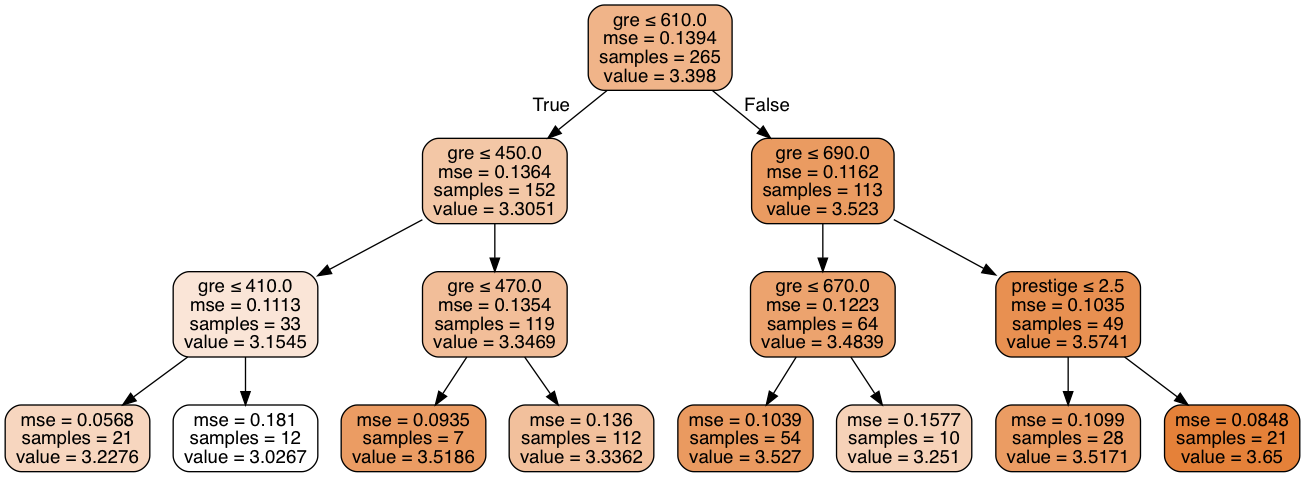

In [120]:
model = build_tree_model(X_train,y_train,3, DecisionTreeRegressor)

tree_diagram(model,X_train)

---

### Building classification trees

With `DecisionTreeClassifier`:

1. Again build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the accuracy scores of each of the models and compare to the logistic regression earlier.

Note that now you'll be using the classification task where we are predicting `admit`.

In [123]:
X_train, X_test, y_train, y_test = train_test_split(Xc, yc, test_size=0.33)

model = DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train)

for num in [1,2,3,0]:
    cross_val(model, X_train, y_train)

Cross-validated scores: [ 0.78571429  0.7037037   0.7037037   0.7037037   0.69230769  0.53846154
  0.69230769  0.73076923  0.69230769  0.73076923]
Cross-Predicted Accuracy: -0.422436929683
Cross-validated scores: [ 0.78571429  0.7037037   0.7037037   0.7037037   0.69230769  0.53846154
  0.69230769  0.73076923  0.69230769  0.73076923]
Cross-Predicted Accuracy: -0.422436929683
Cross-validated scores: [ 0.78571429  0.7037037   0.7037037   0.7037037   0.69230769  0.53846154
  0.69230769  0.73076923  0.69230769  0.73076923]
Cross-Predicted Accuracy: -0.422436929683
Cross-validated scores: [ 0.78571429  0.7037037   0.7037037   0.7037037   0.69230769  0.53846154
  0.69230769  0.73076923  0.69230769  0.73076923]
Cross-Predicted Accuracy: -0.422436929683


---

### Visualize the classification trees

The plotting code will be the same as for regression, you just need to change the model you're using for each plot and the feature names.

The output changes somewhat from the regression tree chart. Earlier it would give the MSE of that node, but now there is a line called `value` that tells you the count of each class at that node.

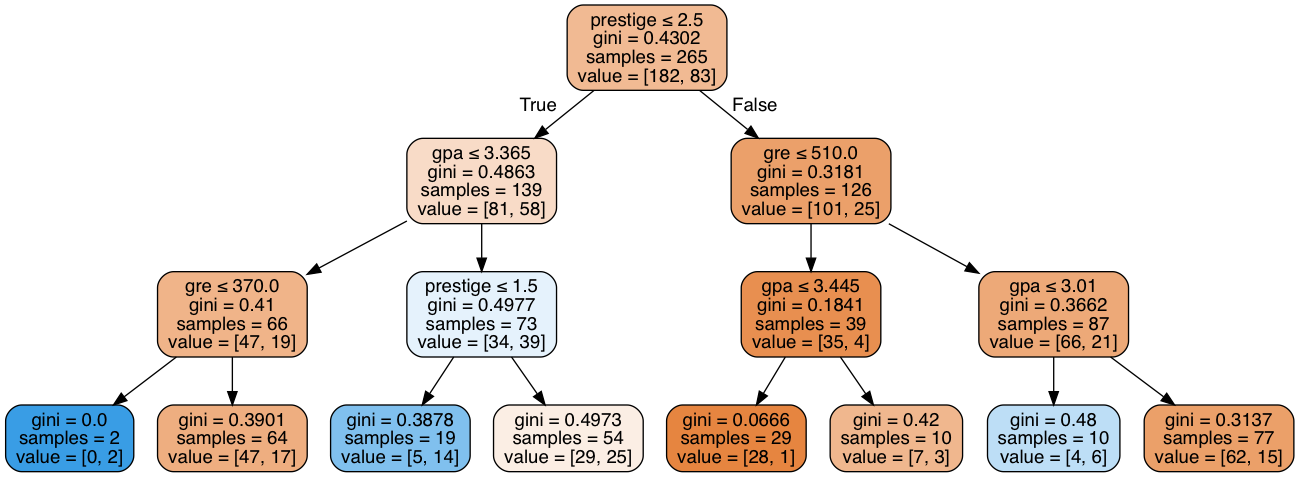

In [122]:
tree_diagram(model,X_train)

---

### Using GridSearchCV to find the best decision tree classifier

Decision tree regression and classification models in sklearn offer a variety of ways to "pre-prune" (by restricting the how many times the tree can branch and what it can use).

Measure           | What it does
------------------|-------------
max_depth         | How many nodes deep can the decision tree go?
max_features      | Is there a cut off to the number of features to use?
max_leaf_nodes    | How many leaves can be generated per node?
min_samples_leaf  | How many samples need to be included at a leaf, at a minimum?  
min_samples_split | How many samples need to be included at a node, at a minimum?

It is not always best to search over _all_ of these in a grid search, unless you have a small dataset. Many of them while not redundant are going to have very similar effects on your model's fit.

Check out the documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

---

#### Switch over to the college stats dataset

We are going to be predicting whether or not a college is public or private. Set up your X, y variables accordingly.

In [136]:
import pandas as pd
col = pd.read_csv('assets/college.csv')

col.columns
features = col.columns
features.drop('Private')

Index([u'Unnamed: 0', u'Apps', u'Accept', u'Enroll', u'Top10perc',
       u'Top25perc', u'F.Undergrad', u'P.Undergrad', u'Outstate',
       u'Room.Board', u'Books', u'Personal', u'PhD', u'Terminal', u'S.F.Ratio',
       u'perc.alumni', u'Expend', u'Grad.Rate'],
      dtype='object')

---

### Set up and run the gridsearch on the data

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
grid = GridSearchCV(estimator=model)
grid.fit(col[features], col.Private)
print(grid)

TypeError: __init__() takes at least 3 arguments (2 given)

---

### Print out the "feature importances"

The model has an attribute called `.feature_importances_` which can tell us which features were most important vs. others. It ranges from 0 to 1, with 1 being the most important.

An easy way to think about the feature importance is how much that particular variable was used to make decisions. Really though, it also takes into account how much that feature contributed to splitting up the class or reducing the variance.

A feature with higher feature importance reduced the criterion (impurity) more than the other features.

Below, show the feature importances for each variable predicting private vs. not, sorted by most important feature to least.